# Lead Scoring Case Study - Logistic Regression

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

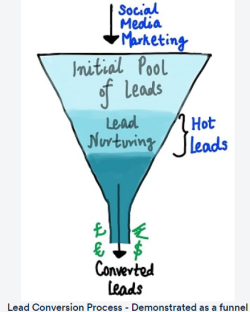

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

### Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)  
pd.set_option('display.width', 1000)

## Reading and Understanding the Data

In [2]:
# importing dataset
df = pd.read_csv('leads.csv')

In [3]:
# top 5 rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# rows and columns
df.shape

(9240, 37)

In [5]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# printing summary
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [7]:
# replacing all the 'Select' label values using NaN
df = df.replace('Select', np.nan)

In [8]:
# printing percentage of missing data in each column
null_perc = round(df.isnull().sum() / df.shape[0] * 100,2).sort_values(ascending = False)
null_perc

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
# dropping columns having missing values greater than 35%
df = df.loc[:,null_perc <=35].copy()

In [10]:
df.shape

(9240, 27)

In [11]:
round(df.isnull().sum() / df.shape[0] * 100,2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [12]:
df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [13]:
df['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [14]:
df.drop(['What matters most to you in choosing a course','Country'], axis=1, inplace=True)

In [15]:
df.shape

(9240, 25)

In [16]:
round(df.isnull().sum() /df.shape[0] * 100,2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00


In [17]:
(df['What is your current occupation'].value_counts(normalize=True)*100)

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [18]:
# imputing missing values by creating a separate label 'Unspecified' in occupation column
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unspecified')

In [19]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Unspecified             2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# creating a function to bin some labels( which are have very less rows ) in occupating column
def occ_bin(inp):
    if inp == 'Unemployed' or inp == 'Unspecified' or inp == 'Working Professional' or inp == 'Student':
        return inp
    else:
        return 'Others'

In [21]:
df['What is your current occupation'] = df['What is your current occupation'].apply(occ_bin)

In [22]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Unspecified             2690
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

In [23]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
df['Lead Source'] = df['Lead Source'].str.title()

In [25]:
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Bing                    6
Click2Call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay Per Click Ads       1
Blog                    1
Welearn                 1
Welearnblog_Home        1
Youtubechannel          1
Testone                 1
Nc_Edm                  1
Name: Lead Source, dtype: int64

In [26]:
# imputing missing data using mode in the lead source variable
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])

In [27]:
# creating a function to bin some labels( which are have very less rows ) in lead source column
def lead_bin(inp):
    if inp == 'Google' or inp == 'Direct Traffic' or inp == 'Olark Chat' or inp == 'Organic Search' or inp == 'Reference' or inp == 'Welingak Website' or inp == 'Referral Sites':
        return inp
    else:
        return 'Others'

In [28]:
df['Lead Source'] = df['Lead Source'].apply(lead_bin)

In [29]:
df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

In [30]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [31]:
df.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content       

In [32]:
# dropping null rows as they are very less
df = df.dropna(axis=0)

The dataset has several columns that each have a single unique label. It makes no sense to preserve these kinds of columns, thus they will be dropped.

In [33]:
# creating a list of those columns which are having only one unique value
cols = []
for i in df.columns:
    if df[i].nunique() == 1:
        cols.append(i)
cols  

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [34]:
# dropping columns
df.drop(cols, axis=1, inplace=True)

In [35]:
cat_var = df.select_dtypes(include ='object').columns

In [36]:
# printing values for each column in loop
for i in cat_var:
    print(i)
    print('______________________________________________________________________________')
    print(df[i].value_counts())
    print('______________________________________________________________________________')

Prospect ID
______________________________________________________________________________
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
51c534e0-8913-468b-9214-6487a55e1fae    1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
                                       ..
d27ecc9b-9176-47d5-a281-09a48af38749    1
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9103, dtype: int64
______________________________________________________________________________
Lead Origin
______________________________________________________________________________
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
_______________________________________________________________________

Columns with two labels and few entries for '1' should be removed since they are irrelevant to our analysis and model building, Therefore we are not considering those columns.

In [37]:
df = df.drop(['Do Not Call','Search','Newspaper Article','Digital Advertisement','Through Recommendations','X Education Forums','Newspaper'], axis=1)

In [38]:
df.shape

(9103, 13)

In [39]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [40]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [41]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

creating functions to bin labels which are having very less number of records so that we can create dummy variables for only relevant labels/category.

In [42]:
# creating a function to bin some labels( which are have very less rows ) in last activity column
def la_bin(inp):
    if inp == 'Had a Phone Conversation' or inp == 'View in browser link Clicked' or inp == 'Approached upfront' or inp == 'Email Received' or inp == 'Email Marked Spam' or inp == 'Visited Booth in Tradeshow' or inp == 'Resubscribed to emails':
        return 'Others'
    else:
        return inp

In [43]:
# creating a function to bin some labels( which are have very less rows ) in last notable activity column
def lna_bin(inp):
    if inp == 'Had a Phone Conversation' or inp == 'View in browser link Clicked' or inp == 'Approached upfront' or inp == 'Email Received' or inp == 'Email Marked Spam' or inp == 'Visited Booth in Tradeshow' or inp == 'Resubscribed to emails' or inp == 'Form Submitted on Website':
        return 'Others'
    else:
        return inp

In [44]:
#applying the function for both the columns

df['Last Activity'] = df['Last Activity'].apply(la_bin)
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lna_bin)

In [45]:
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   61
Others                         42
Name: Last Activity, dtype: int64

In [46]:
df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last Notable Activity, dtype: int64

In [47]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [48]:
df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [49]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

## Exploratory Data Analysis

In [50]:
# creating a copy of the df
df2 = df.copy()

In [51]:
# dropping the Prospect ID and Lead Number variables as we do not need them for Analysis
df2 = df2.drop(['Prospect ID','Lead Number'], axis=1)

In [52]:
# creating a list of all categorcal variables
cat_cols = df2.select_dtypes(include ='object').columns

In [53]:
# creating a list of all numerical variables
num_cols = df2.select_dtypes(exclude ='object').columns

In [54]:
# dropping the target variable from the num_cols as it is categorical in nature.
num_cols = num_cols.drop('Converted')

### Univariate Analysis - 

#### Categorical Features

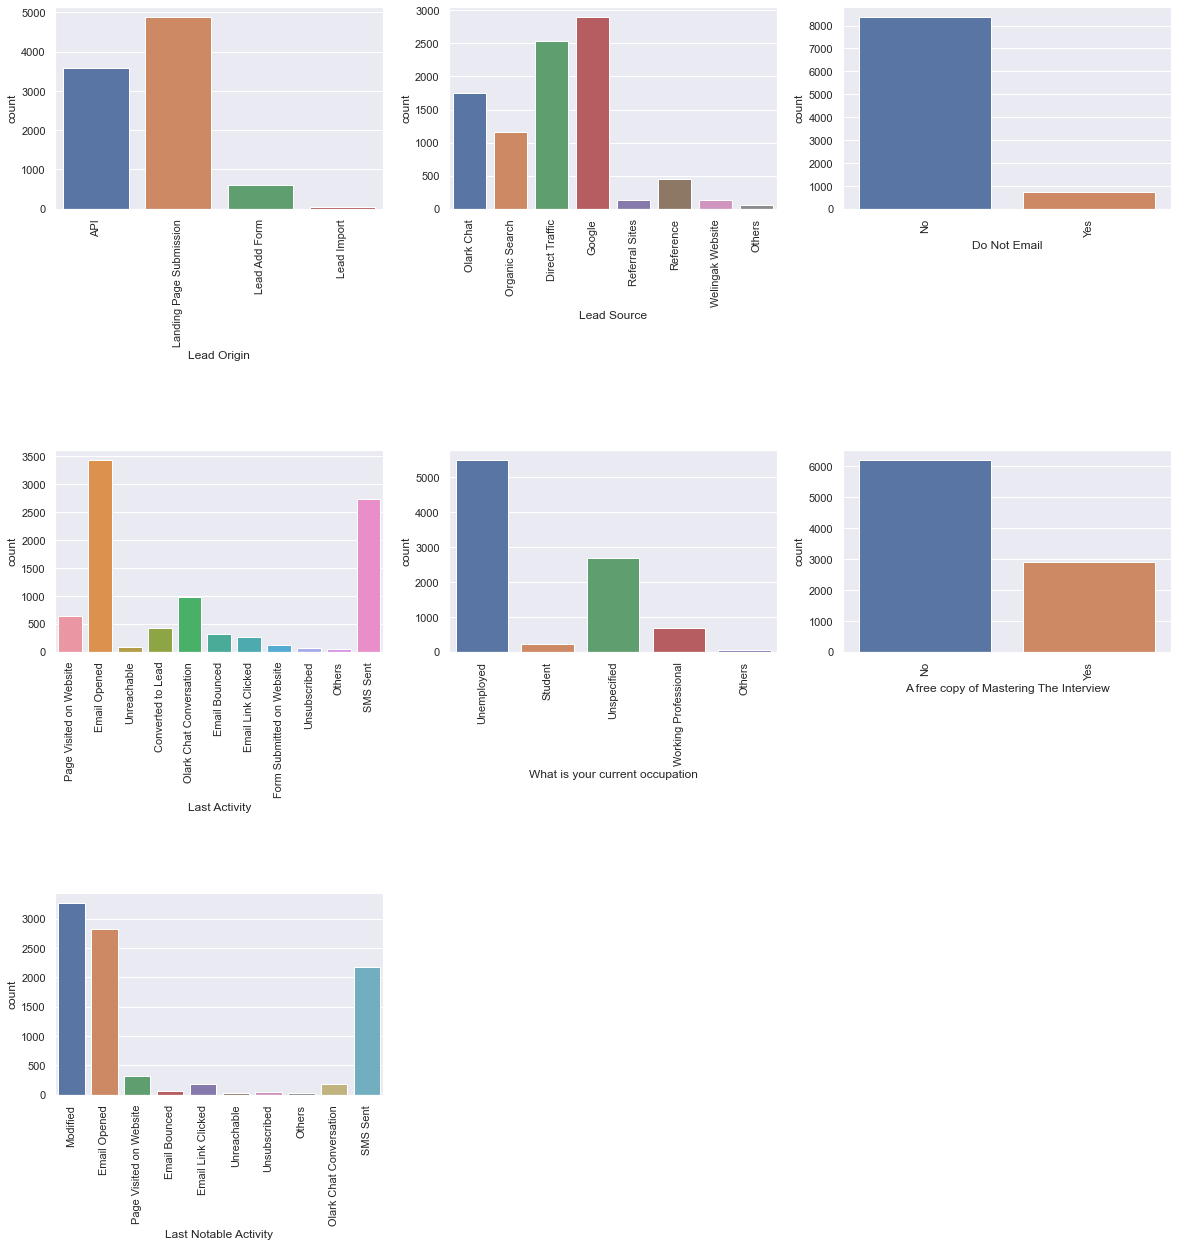

In [55]:
count=1
plt.subplots(figsize=(20, 20))
for i in cat_cols:
    plt.subplot(3,3,count)
    sns.countplot(x = i , data = df2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=1.2)
    count+=1

plt.show()

### Insights:

- Landing Page Submission has the highest number of clients followed by API in Lead Origin variable.
- Most of the clients are coming from Google followed by the Direct traffic category as we can see in the Lead Source distribution.
- The vast majority of clients have chosen to receive emails related to the course.
- Most clients' most recent action was opening an email, then sending a text message.
- It seemed that 86% of customers were unemployed in the Occupation variable.
- "A free copy of Mastering the interview" was not chosen by around 68% of the clients.
- The category "Modified" has the most clients, followed by "Email opened" and "SMS sent."

#### Numerical Features

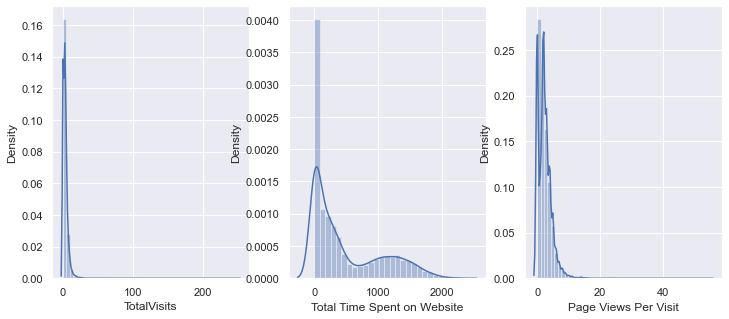

In [56]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.distplot(df2.TotalVisits)
plt.subplot(1,3,2)
sns.distplot(df2['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.distplot(df2['Page Views Per Visit'])
plt.show()

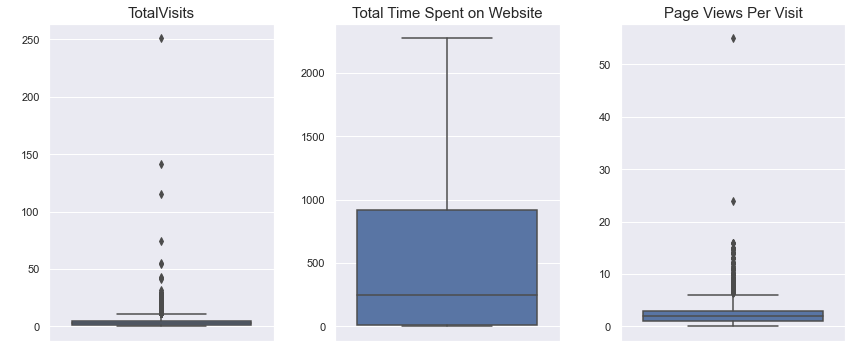

In [57]:
fig, ax =plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12,5))

for i in range(len(num_cols)):
    sns.boxplot(y=df2[num_cols[i]], ax=ax[i])
    
    ax[i].set_title(f'{num_cols[i]}', fontsize=15)
    ax[i].set_ylabel(' ')
    
plt.tight_layout()
plt.show()

### Insights:
- There was not any abnormality in the ‘Total time spent on website’ distribution.
- The variables "Total visits" and "Page views per visit" appear to have a similar type of distribution with some outliers in them.


## Target Variable:

In [58]:
target = round(df2.Converted.value_counts(normalize=True)*100)
target

0    62.0
1    38.0
Name: Converted, dtype: float64

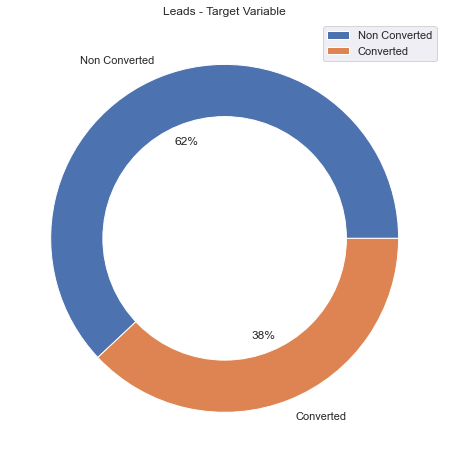

In [59]:
plt.figure(figsize=(12,8))
plt.title('Leads - Target Variable')

#plotting pie chart
plt.pie(target, labels = ['Non Converted', 'Converted'], autopct='%.0f%%')
plt.legend()

#drawing circle in pie chart centre to create a donut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

### Insights:

- Approximately 38% of clients were converted,
as seen in the donut figure, whereas 62% were
not.


### Bivariate Analysis:

#### Categorical Features

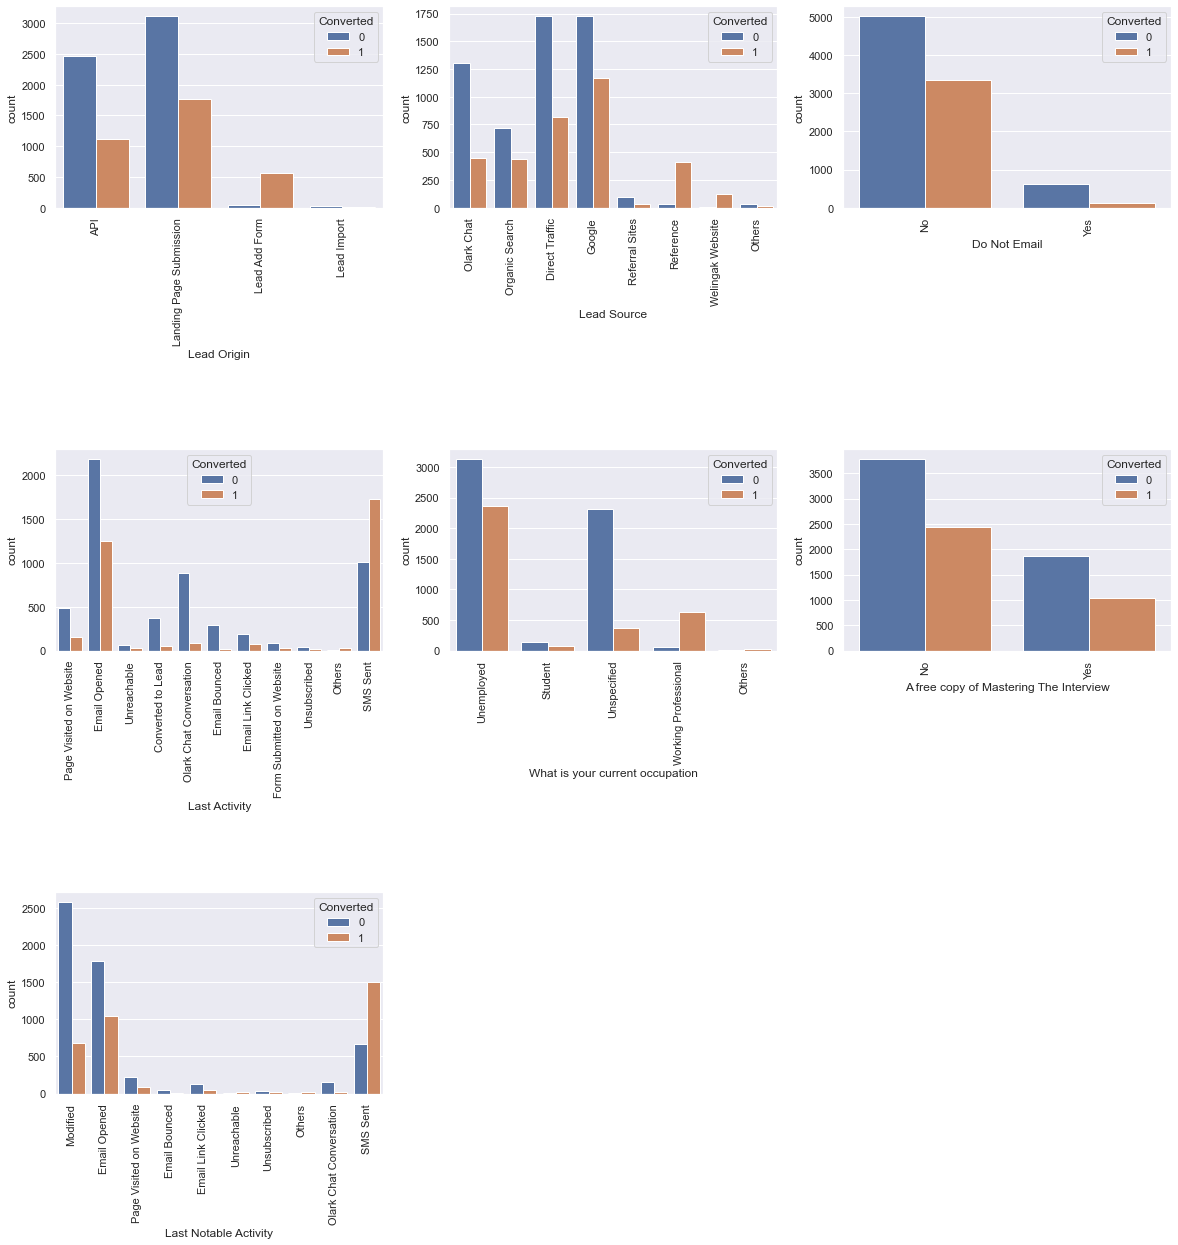

In [60]:
count=1
plt.subplots(figsize=(20, 20))
for i in cat_cols:
    plt.subplot(3,3,count)
    sns.countplot(x = i , data = df2, hue='Converted')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=1.2)
    count+=1

plt.show()

### Insights:
- The conversion rate for the "Lead Add Form" category appears to be 93%, and 36% for the "Landing Page Submission" category.
- The customer arriving through the "Welingak website," "Reference," and "Google" has an extraordinarily high conversion rate.
- 40% of customers who choose to receive emails about the course end up enrolling.
- Around 63% of the clients in the "SMS sent" category have converted, and 36% of the consumers in the "Email opened" category.

- The group of "Working professionals" appeared to have the greatest conversion rate overall, which is pretty evident, followed by those who were "Unemployed."
- The conversion graph for "A free copy of mastering the interview" revealed no discernible trends or insights.
- Approximately 69% of clients in the "SMS sent" category and 36% of clients in the "Email opened" category have converted; nevertheless, the numbers are comparable to the "Last action" conversion plot.



#### Numerical Features

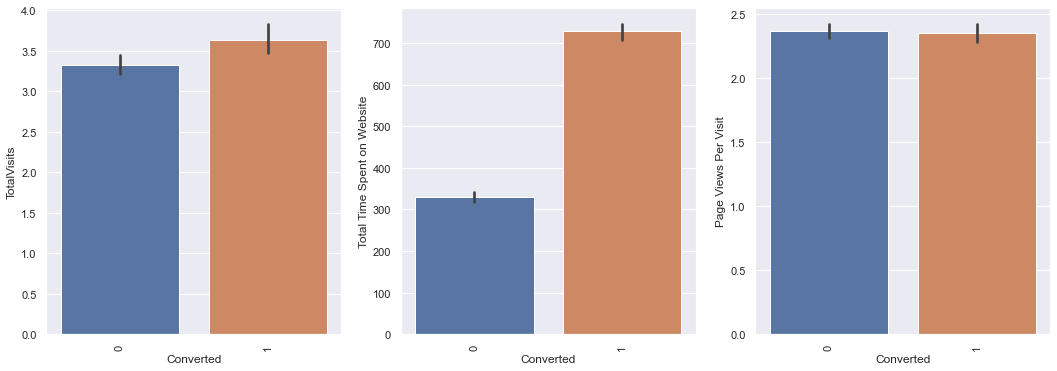

In [61]:
count=1
plt.subplots(figsize=(18, 6))
for i in num_cols:
    plt.subplot(1,3,count)
    sns.barplot(y = i , data = df2, x='Converted')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=1.2)
    count+=1

plt.show()

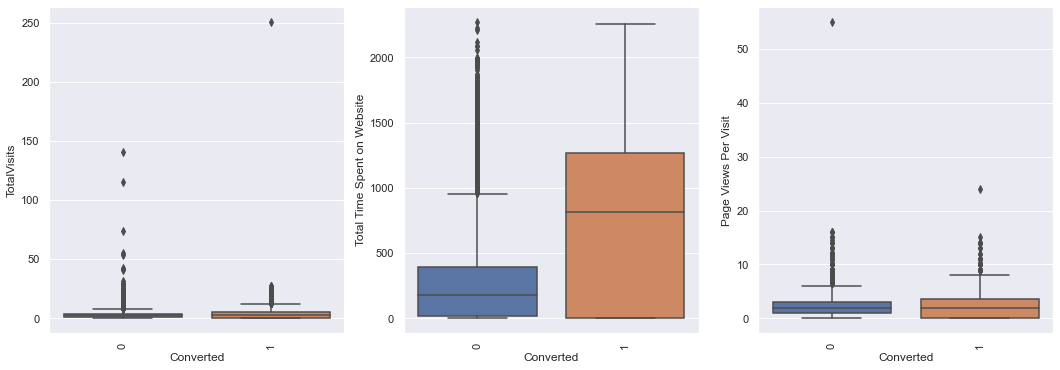

In [62]:
count=1
plt.subplots(figsize=(18, 6))
for i in num_cols:
    plt.subplot(1,3,count)
    sns.boxplot(y = i , data = df2, x='Converted')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=1.2)
    count+=1

plt.show()

### Insights:
- The average "total time spent on website" for those who converted was exceptionally high i.e. 728, compared to 328 for those who weren't converted.
- There were no significant trends or patterns to be found in the conversion graph for "Page views per visit".

### Multivariate Analysis:

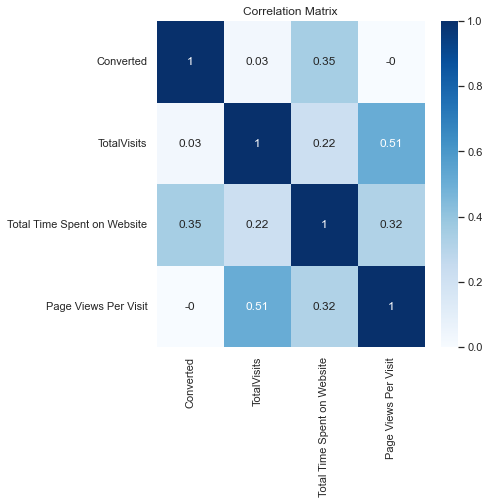

In [63]:
# plotting heatmap to check correlation between numerical features
plt.figure(figsize = (6,6))
sns.heatmap(round(df2.corr(),2), annot = True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

### Insight:
- The only variable that has some correlation with the target variable is "Total Time Spent on Website".


## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [64]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df2[varlist] = df2[varlist].apply(binary_map)

In [65]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


#### For categorical variables with multiple levels, creating dummy variables (one-hot encoded)

In [66]:
# creating a list of categorical features
cat_var = df2.select_dtypes(include='object').columns
cat_var = list(cat_var)
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [67]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df2[cat_var], drop_first=True)

# Adding the results to the master dataframe
df2 = pd.concat([df2, dummy], axis=1)

In [68]:
df2.shape

(9103, 44)

#### Dropping the repeated variables

In [69]:
# We have created dummies for the below variables, so we can drop them
df2 = df2.drop(cat_var,axis=1)

In [70]:
df2.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [71]:
df2.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.380204,3.445238,481.350104,2.362820,0.317258,0.536746,0.066791,0.003405,0.318796,0.192574,0.126771,0.005932,0.048665,0.013732,0.014171,0.034274,0.029331,0.377568,0.012743,0.106778,0.004614,0.070306,0.300780,0.009887,0.006701,0.022740,0.604416,0.294738,0.074591,0.019005,0.310557,0.359222,0.020103,0.002307,0.034934,0.238603,0.003515,0.005163
std,0.270586,0.485464,4.854853,545.066142,2.161418,0.465434,0.498675,0.249674,0.058260,0.466035,0.394343,0.332735,0.076796,0.215179,0.116382,0.118203,0.181943,0.168742,0.484805,0.112170,0.308848,0.067772,0.255677,0.458622,0.098945,0.081590,0.149081,0.489003,0.455950,0.262744,0.136549,0.462747,0.479799,0.140361,0.047978,0.183622,0.426253,0.059189,0.071673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,919.500000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,1.000000,7.000000,1372.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0000

## Splitting the Data into Training and Testing Sets

In [72]:
from sklearn.model_selection import train_test_split

Dividing dataset into X and y sets for the model building

In [73]:
# Putting feature variable to X
X = df2.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [74]:
y = df2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [76]:
# checking shape for X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6372, 38), (2731, 38), (6372,), (2731,))

## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
#scaling all the numerical features using StandardScalar
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
7962,0,-0.092900,1.476324,-0.394072,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5520,0,0.695064,-0.771066,2.111481,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1962,0,0.301082,-0.571257,0.061483,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1566,0,2.074000,1.393834,0.517039,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
9170,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [79]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,6372.000000,6.372000e+03,6.372000e+03,6.372000e+03,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.079567,5.867787e-17,-3.451588e-17,5.721865e-17,0.316855,0.536566,0.067797,0.004080,0.322662,0.190992,0.126491,0.007062,0.048650,0.013340,0.015380,0.035311,0.028562,0.373352,0.013653,0.108129,0.005336,0.071092,0.300220,0.011456,0.006591,0.020559,0.609699,0.291902,0.073917,0.018832,0.307596,0.357502,0.021186,0.002197,0.036095,0.240584,0.003923,0.005022
std,0.270643,1.000078e+00,1.000078e+00,1.000078e+00,0.465287,0.498700,0.251416,0.063752,0.467531,0.393113,0.332428,0.083746,0.215153,0.114733,0.123068,0.184579,0.166586,0.483732,0.116057,0.310568,0.072857,0.256999,0.458389,0.106428,0.080925,0.141913,0.487856,0.454673,0.261657,0.135943,0.461534,0.479302,0.144017,0.046826,0.186542,0.427472,0.062519,0.070693
min,0.000000,-6.838726e-01,-8.810520e-01,-1.077404e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.868817e-01,-8.645540e-01,-6.218491e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-9.289983e-02,-4.356069e-01,-1.662941e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.010820e-01,8.017404e-01,2.892610e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.876085e+01,3.248939e+00,2.397813e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [80]:
### Checking the Conversion Rate
conversion_rate = round((sum(df2['Converted'])/len(df2['Converted'].index))*100,2)
conversion_rate

38.02

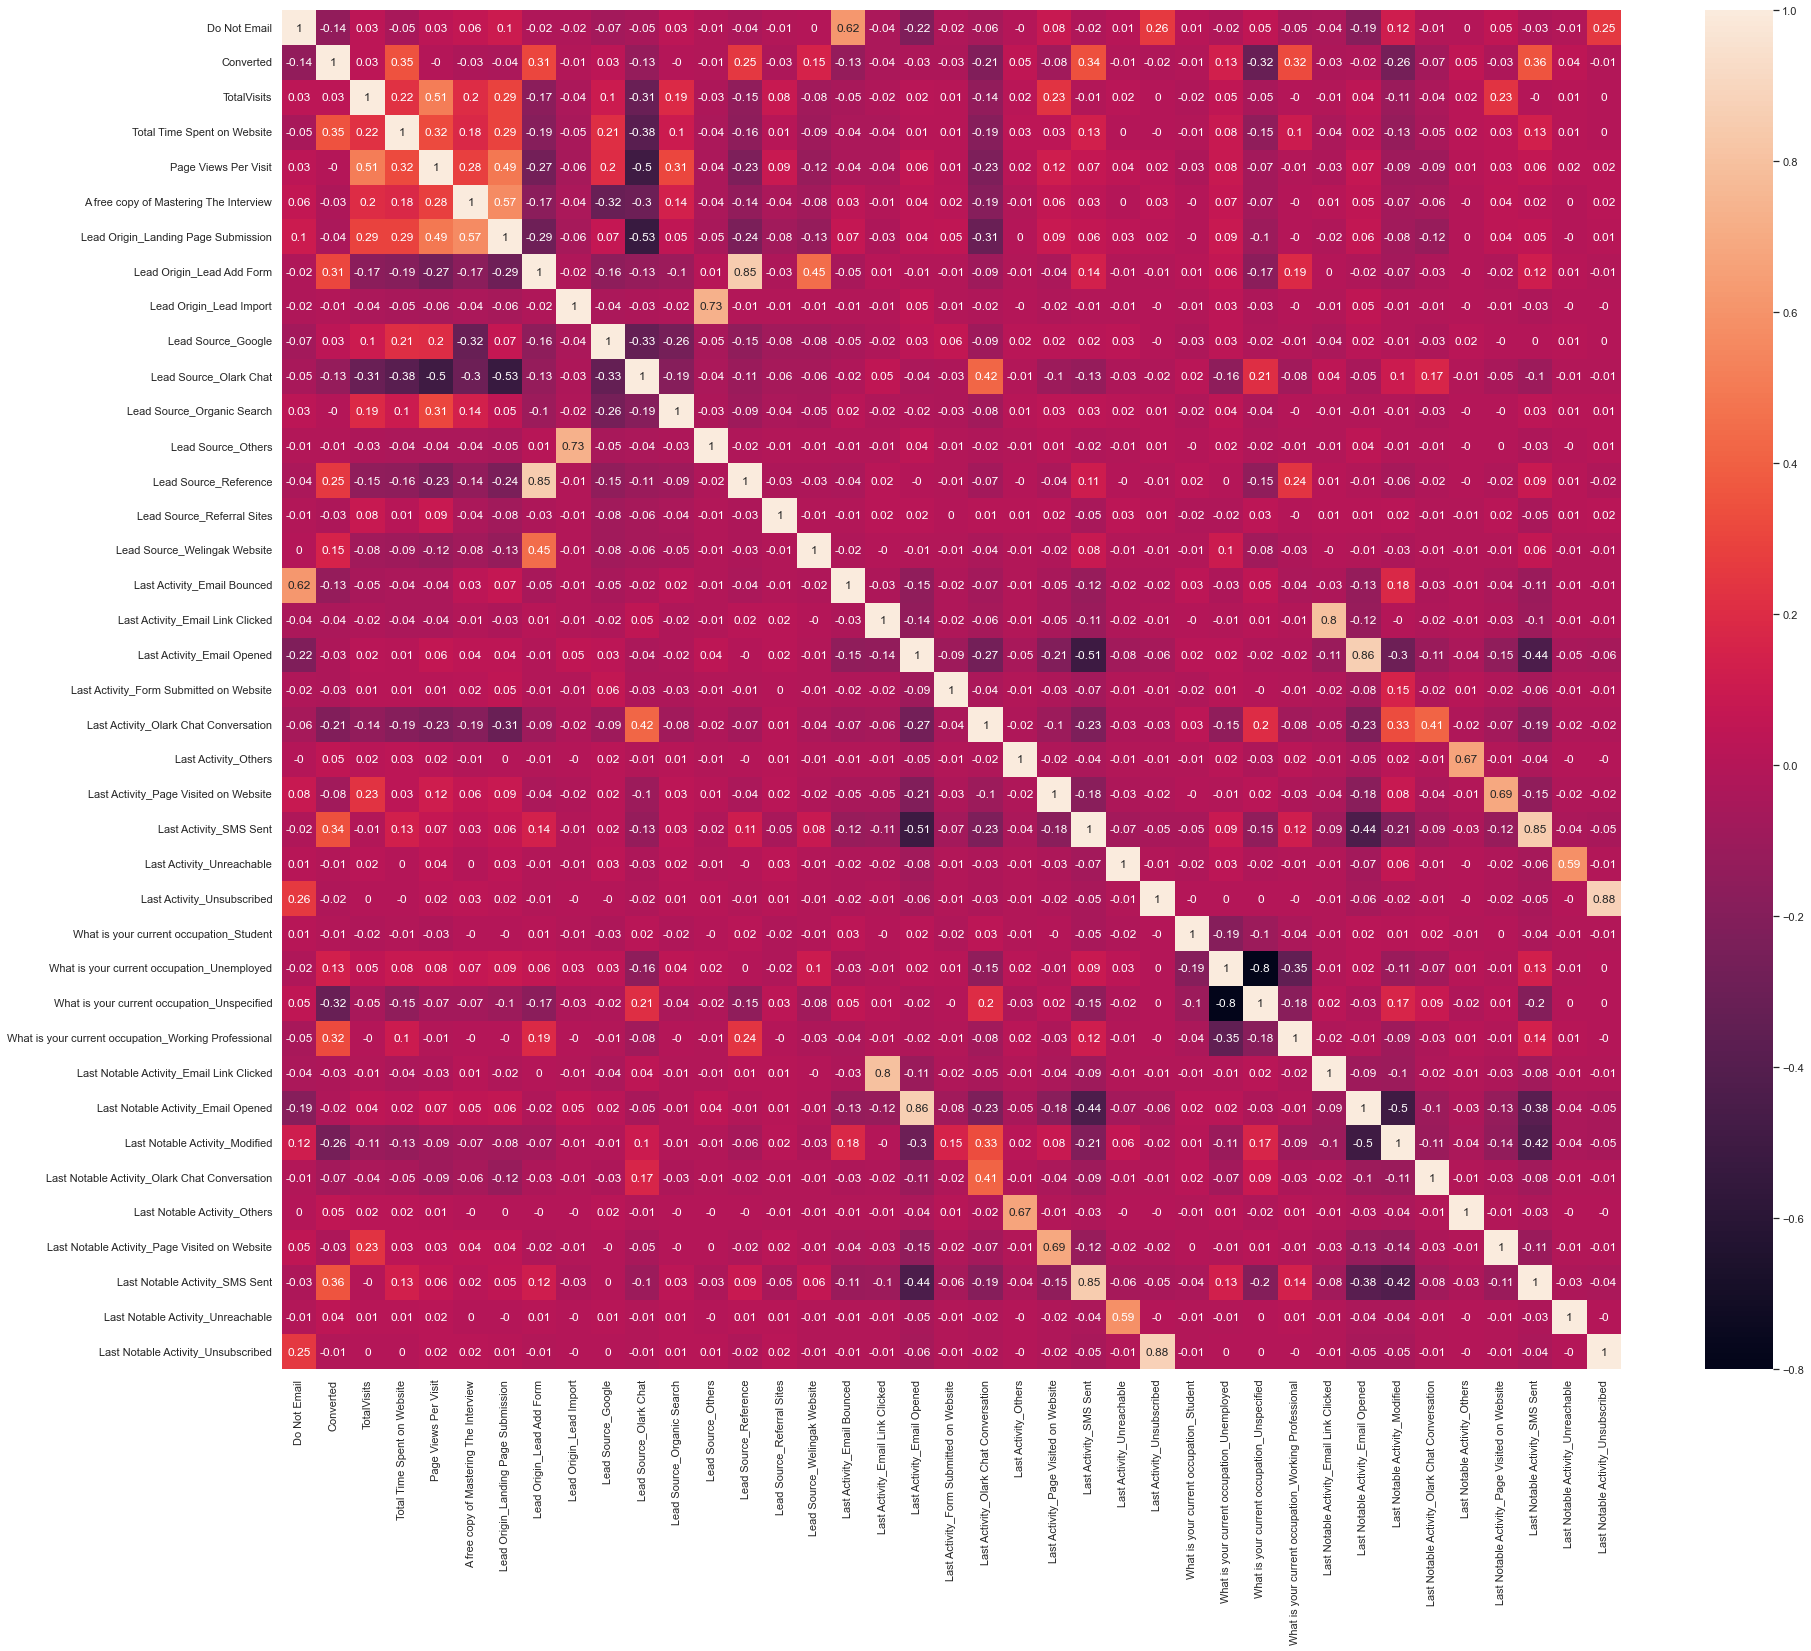

In [81]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,25))        # Size of the figure
sns.heatmap(round(df2.corr(),2),annot = True)
plt.show()

## Model Building using Logistic Regression

In [82]:
import statsmodels.api as sm

In [83]:
#building our first logistic model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.0
Date:                Tue, 13 Sep 2022   Deviance:                       5068.1
Time:                        21:48:40   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4128
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0605      0.840     -0.072      0.943      -1.706       1.585
Do Not Email                                            -1.4111      0.217     -6.515      0.000      -1.836      -0.987
TotalVisits                                              0.2222      0.055      4.064      0.000       0.115       0.329
Total Time Spent on Website                              1.1016      0.041     26.763      0.000       1.021       1.182
Page Views Per Visit                                    -0.1371      0.055     -2.504      0.012      -0.244      -0.030
A free copy of Mastering The Interview                   0.0428      0.106      0.402      0.688      -0.166       0.251
Lead Origin_Landing Page Submission                     -0.1933      0.108     -1.790      0.073      -0.405       0.018
Lead Origin_Lead Add Form                                3.4523      0.782      4.413      0.000       1.919       4.986
Lead Origin_Lead Import                                  0.8695      0.775      1.122      0.262      -0.649       2.388
Lead Source_Google                                       0.3349      0.114      2.927      0.003       0.111       0.559
Lead Source_Olark Chat                                   1.2819      0.163      7.882      0.000       0.963       1.601
Lead Source_Organic Search                               0.1174      0.129      0.914      0.361      -0.134       0.369
Lead Source_Others                                       0.2739      0.663      0.413      0.680      -1.026       1.574
Lead Source_Reference                                    0.2580      0.814      0.317      0.751      -1.336       1.853
Lead Source_Referral Sites                              -0.1314      0.371     -0.354      0.723      -0.859       0.596
Lead Source_Welingak Website                             2.1206      1.063      1.995      0.046       0.037       4.204
Last Activity_Email Bounced                              0.2331      0.521      0.448      0.654      -0.787       1.253
Last Activity_Email Link Clicked                         0.5914      0.431      1.371      0.170      -0.254       1.437
Last Activity_Email Opened                               1.2338      0.246      5.013      0.000       0.751       1.716
Last Activity_Form Submitted on Website                  0.5912      0.382      1.547      0.122      -0.158       1.340
Last Activity_Olark Chat Conversation                   -0.1956      0.279     -0.700      0.484      -0.743       0.352
Last Activity_Others                                     1.9027      0.584      3.255      0.001       0.757       3.048
Last Activity_Page Visited on Website                    0

## Feature Selection Using RFE

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [86]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False])

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unr

In [88]:
col = X_train.columns[rfe.support_]

In [89]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'], dtype='object')

In [90]:
# considering attributes which are selected by rfe
X_train_rfe = X_train[col]

#### Model 2

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.7
Date:                Tue, 13 Sep 2022   Deviance:                       5123.4
Time:                        21:48:43   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1733      0.493      0.352      0.725      -0.793       1.139
Do Not Email                                            -1.3716      0.186     -7.393      0.000      -1.735      -1.008
Total Time Spent on Website                              1.1155      0.041     27.237      0.000       1.035       1.196
Lead Origin_Lead Add Form                                3.6939      0.224     16.491      0.000       3.255       4.133
Lead Origin_Lead Import                                  1.0897      0.446      2.444      0.015       0.216       1.964
Lead Source_Olark Chat                                   1.2032      0.105     11.503      0.000       0.998       1.408
Lead Source_Welingak Website                             1.8386      0.753      2.442      0.015       0.363       3.314
Last Activity_Email Opened                               1.0998      0.157      6.995      0.000       0.792       1.408
Last Activity_Others                                     1.7612      0.558      3.159      0.002       0.668       2.854
Last Activity_SMS Sent                                   1.5456      0.117     13.171      0.000       1.316       1.776
Last Activity_Unreachable                                0.3875      0.460      0.843      0.399      -0.514       1.289
Last Activity_Unsubscribed                               1.2585      0.491      2.564      0.010       0.297       2.221
What is your current occupation_Student                 -1.2830      0.535     -2.399      0.016      -2.331      -0.235
What is your current occupation_Unemployed              -1.3933      0.484     -2.877      0.004      -2.342      -0.444
What is your current occupation_Unspecified             -2.5556      0.489     -5.227      0.000      -3.514      -1.597
What is your current occupation_Working Professional     1.1339      0.515      2.202      0.028       0.124       2.143
Last Notable Activity_Email Opened                      -0.8433      0.182     -4.626      0.000      -1.201      -0.486
Last Notable Activity_Modified                          -0.9842      0.115     -8.523      0.000      -1.211      -0.758
Last Notable Activity_Olark Chat Conversation           -0.9248      0.331     -2.797      0.005      -1.573      -0.277
Last Notable Activity_Others                             1.0493      1.022      1.026      0.305      -0.955       3.053
Last Notable Activity_Unreachable                        1.6546      0.694      2.385      0.017       0.295       3.014
========================================================================================================================
"""

#### Checking VIFs


Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# creating helper function to calculate Variance inflation factor (VIF)

def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [94]:
check_vif(X_train_rfe)

,Features,VIF
15,Last Notable Activity_Email Opened,8.82
6,Last Activity_Email Opened,7.43
12,What is your current occupation_Unemployed,6.76
13,What is your current occupation_Unspecified,4.05
16,Last Notable Activity_Modified,3.66
8,Last Activity_SMS Sent,3.21
14,What is your current occupation_Working Profes...,1.79
7,Last Activity_Others,1.73
18,Last Notable Activity_Others,1.72
4,Lead Source_Olark Chat,1.61


Since "Last Activity_Unreachable" variable has high p-value, hence dropping it

In [95]:
X = X_train_rfe.drop('Last Activity_Unreachable', axis=1)

#### Model 3

In [96]:
X_train_sm = sm.add_constant(X)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.0
Date:                Tue, 13 Sep 2022   Deviance:                       5124.0
Time:                        21:48:43   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1743      0.493      0.354      0.723      -0.791       1.140
Do Not Email                                            -1.3713      0.186     -7.391      0.000      -1.735      -1.008
Total Time Spent on Website                              1.1149      0.041     27.232      0.000       1.035       1.195
Lead Origin_Lead Add Form                                3.6942      0.224     16.486      0.000       3.255       4.133
Lead Origin_Lead Import                                  1.0870      0.446      2.438      0.015       0.213       1.961
Lead Source_Olark Chat                                   1.1995      0.104     11.484      0.000       0.995       1.404
Lead Source_Welingak Website                             1.8343      0.753      2.436      0.015       0.359       3.310
Last Activity_Email Opened                               1.0863      0.156      6.952      0.000       0.780       1.393
Last Activity_Others                                     1.7473      0.557      3.136      0.002       0.655       2.839
Last Activity_SMS Sent                                   1.5374      0.117     13.163      0.000       1.308       1.766
Last Activity_Unsubscribed                               1.2506      0.491      2.549      0.011       0.289       2.212
What is your current occupation_Student                 -1.2788      0.534     -2.393      0.017      -2.326      -0.231
What is your current occupation_Unemployed              -1.3863      0.484     -2.865      0.004      -2.335      -0.438
What is your current occupation_Unspecified             -2.5505      0.489     -5.221      0.000      -3.508      -1.593
What is your current occupation_Working Professional     1.1360      0.515      2.207      0.027       0.127       2.145
Last Notable Activity_Email Opened                      -0.8363      0.182     -4.594      0.000      -1.193      -0.480
Last Notable Activity_Modified                          -0.9770      0.115     -8.493      0.000      -1.203      -0.752
Last Notable Activity_Olark Chat Conversation           -0.9294      0.331     -2.812      0.005      -1.577      -0.282
Last Notable Activity_Others                             1.0564      1.022      1.033      0.301      -0.947       3.060
Last Notable Activity_Unreachable                        2.0355      0.527      3.861      0.000       1.002       3.069
========================================================================================================================
"""

In [97]:
check_vif(X)

,Features,VIF
14,Last Notable Activity_Email Opened,8.81
6,Last Activity_Email Opened,7.38
11,What is your current occupation_Unemployed,6.73
12,What is your current occupation_Unspecified,4.04
15,Last Notable Activity_Modified,3.64
8,Last Activity_SMS Sent,3.20
13,What is your current occupation_Working Profes...,1.79
7,Last Activity_Others,1.73
17,Last Notable Activity_Others,1.72
4,Lead Source_Olark Chat,1.60


Dropping "Last Notable Activity_Others" variable as this is having very few records and will not be relevant for the model building

In [98]:
X = X.drop('Last Notable Activity_Others', axis=1)

#### Model 4

In [99]:
X_train_sm = sm.add_constant(X)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.6
Date:                Tue, 13 Sep 2022   Deviance:                       5125.2
Time:                        21:48:44   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1860      0.492      0.378      0.706      -0.779       1.151
Do Not Email                                            -1.3721      0.185     -7.402      0.000      -1.735      -1.009
Total Time Spent on Website                              1.1148      0.041     27.239      0.000       1.035       1.195
Lead Origin_Lead Add Form                                3.6940      0.224     16.483      0.000       3.255       4.133
Lead Origin_Lead Import                                  1.0893      0.446      2.443      0.015       0.215       1.963
Lead Source_Olark Chat                                   1.1984      0.104     11.476      0.000       0.994       1.403
Lead Source_Welingak Website                             1.8359      0.753      2.438      0.015       0.360       3.312
Last Activity_Email Opened                               1.0906      0.156      6.980      0.000       0.784       1.397
Last Activity_Others                                     2.0896      0.454      4.600      0.000       1.199       2.980
Last Activity_SMS Sent                                   1.5297      0.117     13.128      0.000       1.301       1.758
Last Activity_Unsubscribed                               1.2429      0.491      2.534      0.011       0.281       2.204
What is your current occupation_Student                 -1.2798      0.535     -2.394      0.017      -2.327      -0.232
What is your current occupation_Unemployed              -1.3881      0.484     -2.869      0.004      -2.336      -0.440
What is your current occupation_Unspecified             -2.5490      0.489     -5.217      0.000      -3.507      -1.591
What is your current occupation_Working Professional     1.1328      0.515      2.201      0.028       0.124       2.142
Last Notable Activity_Email Opened                      -0.8510      0.181     -4.689      0.000      -1.207      -0.495
Last Notable Activity_Modified                          -0.9918      0.114     -8.686      0.000      -1.216      -0.768
Last Notable Activity_Olark Chat Conversation           -0.9400      0.330     -2.845      0.004      -1.587      -0.292
Last Notable Activity_Unreachable                        2.0244      0.527      3.842      0.000       0.992       3.057
========================================================================================================================
"""

In [100]:
check_vif(X)

,Features,VIF
14,Last Notable Activity_Email Opened,8.77
6,Last Activity_Email Opened,7.38
11,What is your current occupation_Unemployed,6.68
12,What is your current occupation_Unspecified,4.01
15,Last Notable Activity_Modified,3.60
8,Last Activity_SMS Sent,3.18
13,What is your current occupation_Working Profes...,1.78
4,Lead Source_Olark Chat,1.60
2,Lead Origin_Lead Add Form,1.59
5,Lead Source_Welingak Website,1.32


Now, Dropping "Last Notable Activity_Email Opened" variable to avoid any multicollinearity since it has high VIF value

In [101]:
X = X.drop('Last Notable Activity_Email Opened', axis=1)

#### Model 5

In [102]:
X_train_sm = sm.add_constant(X)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.4
Date:                Tue, 13 Sep 2022   Deviance:                       5146.8
Time:                        21:48:44   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.487     -0.147      0.883      -1.026       0.883
Do Not Email                                            -1.3394      0.185     -7.258      0.000      -1.701      -0.978
Total Time Spent on Website                              1.1165      0.041     27.333      0.000       1.036       1.197
Lead Origin_Lead Add Form                                3.7288      0.225     16.601      0.000       3.289       4.169
Lead Origin_Lead Import                                  1.0326      0.448      2.304      0.021       0.154       1.911
Lead Source_Olark Chat                                   1.2060      0.104     11.568      0.000       1.002       1.410
Lead Source_Welingak Website                             1.8015      0.754      2.391      0.017       0.325       3.278
Last Activity_Email Opened                               0.5584      0.111      5.043      0.000       0.341       0.775
Last Activity_Others                                     2.1123      0.452      4.674      0.000       1.227       2.998
Last Activity_SMS Sent                                   1.6993      0.111     15.248      0.000       1.481       1.918
Last Activity_Unsubscribed                               1.3978      0.487      2.871      0.004       0.444       2.352
What is your current occupation_Student                 -1.2607      0.532     -2.371      0.018      -2.303      -0.219
What is your current occupation_Unemployed              -1.3624      0.481     -2.833      0.005      -2.305      -0.420
What is your current occupation_Unspecified             -2.5385      0.486     -5.228      0.000      -3.490      -1.587
What is your current occupation_Working Professional     1.1600      0.512      2.266      0.023       0.157       2.163
Last Notable Activity_Modified                          -0.6673      0.091     -7.367      0.000      -0.845      -0.490
Last Notable Activity_Olark Chat Conversation           -0.7072      0.327     -2.162      0.031      -1.349      -0.066
Last Notable Activity_Unreachable                        2.2610      0.525      4.304      0.000       1.231       3.291
========================================================================================================================
"""

In [103]:
check_vif(X)

,Features,VIF
11,What is your current occupation_Unemployed,5.41
6,Last Activity_Email Opened,3.34
12,What is your current occupation_Unspecified,3.31
8,Last Activity_SMS Sent,2.85
14,Last Notable Activity_Modified,2.33
13,What is your current occupation_Working Profes...,1.64
4,Lead Source_Olark Chat,1.60
2,Lead Origin_Lead Add Form,1.58
5,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.31


Dropping "Last Notable Activity_Olark Chat Conversation" variable as it is having high p-value.

In [104]:
X = X.drop('Last Notable Activity_Olark Chat Conversation', axis=1)

#### Model 6

In [105]:
X_train_sm = sm.add_constant(X)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.9
Date:                Tue, 13 Sep 2022   Deviance:                       5151.9
Time:                        21:48:44   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1324      0.487     -0.272      0.786      -1.087       0.823
Do Not Email                                            -1.3191      0.184     -7.151      0.000      -1.681      -0.958
Total Time Spent on Website                              1.1135      0.041     27.270      0.000       1.033       1.193
Lead Origin_Lead Add Form                                3.7198      0.225     16.566      0.000       3.280       4.160
Lead Origin_Lead Import                                  1.0174      0.448      2.270      0.023       0.139       1.896
Lead Source_Olark Chat                                   1.1811      0.104     11.388      0.000       0.978       1.384
Lead Source_Welingak Website                             1.7824      0.753      2.366      0.018       0.306       3.259
Last Activity_Email Opened                               0.6336      0.106      5.988      0.000       0.426       0.841
Last Activity_Others                                     2.1626      0.451      4.793      0.000       1.278       3.047
Last Activity_SMS Sent                                   1.7701      0.107     16.504      0.000       1.560       1.980
Last Activity_Unsubscribed                               1.4536      0.486      2.992      0.003       0.501       2.406
What is your current occupation_Student                 -1.2900      0.532     -2.424      0.015      -2.333      -0.247
What is your current occupation_Unemployed              -1.3761      0.482     -2.856      0.004      -2.320      -0.432
What is your current occupation_Unspecified             -2.5633      0.486     -5.269      0.000      -3.517      -1.610
What is your current occupation_Working Professional     1.1520      0.513      2.246      0.025       0.146       2.157
Last Notable Activity_Modified                          -0.6213      0.088     -7.050      0.000      -0.794      -0.449
Last Notable Activity_Unreachable                        2.3426      0.525      4.466      0.000       1.315       3.371
========================================================================================================================
"""

In [106]:
check_vif(X)

,Features,VIF
11,What is your current occupation_Unemployed,4.94
6,Last Activity_Email Opened,3.06
12,What is your current occupation_Unspecified,3.00
8,Last Activity_SMS Sent,2.65
14,Last Notable Activity_Modified,2.16
13,What is your current occupation_Working Profes...,1.59
2,Lead Origin_Lead Add Form,1.58
4,Lead Source_Olark Chat,1.57
5,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.31


Dropping "What is your current occupation_Unspecified" variable because We have imputed the missing data using 'Unspecified' label and hence will not be required for the model.

In [107]:
X = X.drop('What is your current occupation_Unspecified', axis=1)

#### Model 7

In [108]:
X_train_sm = sm.add_constant(X)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.8
Date:                Tue, 13 Sep 2022   Deviance:                       5179.7
Time:                        21:48:44   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6234      0.127    -20.622      0.000      -2.873      -2.374
Do Not Email                                            -1.3096      0.184     -7.119      0.000      -1.670      -0.949
Total Time Spent on Website                              1.1152      0.041     27.382      0.000       1.035       1.195
Lead Origin_Lead Add Form                                3.7549      0.225     16.674      0.000       3.314       4.196
Lead Origin_Lead Import                                  1.0127      0.448      2.262      0.024       0.135       1.890
Lead Source_Olark Chat                                   1.1652      0.103     11.282      0.000       0.963       1.368
Lead Source_Welingak Website                             1.7469      0.754      2.318      0.020       0.270       3.224
Last Activity_Email Opened                               0.6328      0.105      6.006      0.000       0.426       0.839
Last Activity_Others                                     2.1477      0.451      4.767      0.000       1.265       3.031
Last Activity_SMS Sent                                   1.7483      0.107     16.384      0.000       1.539       1.957
Last Activity_Unsubscribed                               1.4228      0.485      2.932      0.003       0.472       2.374
What is your current occupation_Student                  1.2069      0.243      4.959      0.000       0.730       1.684
What is your current occupation_Unemployed               1.1237      0.087     12.933      0.000       0.953       1.294
What is your current occupation_Working Professional     3.6480      0.200     18.284      0.000       3.257       4.039
Last Notable Activity_Modified                          -0.6183      0.088     -7.047      0.000      -0.790      -0.446
Last Notable Activity_Unreachable                        2.3110      0.523      4.415      0.000       1.285       3.337
========================================================================================================================
"""

In [109]:
check_vif(X)

,Features,VIF
11,What is your current occupation_Unemployed,2.50
8,Last Activity_SMS Sent,1.72
6,Last Activity_Email Opened,1.69
2,Lead Origin_Lead Add Form,1.58
4,Lead Source_Olark Chat,1.40
13,Last Notable Activity_Modified,1.39
5,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.31
12,What is your current occupation_Working Profes...,1.30
0,Do Not Email,1.19


Because of high p-value, dropping "Lead Origin_Lead" Import variable

In [110]:
X = X.drop('Lead Origin_Lead Import', axis=1)

#### Model 8

In [111]:
X_train_sm = sm.add_constant(X)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res8 = logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.1
Date:                Tue, 13 Sep 2022   Deviance:                       5184.2
Time:                        21:48:45   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4020
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6221      0.127    -20.628      0.000      -2.871      -2.373
Do Not Email                                            -1.3112      0.184     -7.135      0.000      -1.671      -0.951
Total Time Spent on Website                              1.1066      0.040     27.356      0.000       1.027       1.186
Lead Origin_Lead Add Form                                3.7358      0.225     16.608      0.000       3.295       4.177
Lead Source_Olark Chat                                   1.1492      0.103     11.172      0.000       0.948       1.351
Lead Source_Welingak Website                             1.7482      0.754      2.320      0.020       0.271       3.225
Last Activity_Email Opened                               0.6419      0.105      6.104      0.000       0.436       0.848
Last Activity_Others                                     2.1434      0.450      4.763      0.000       1.261       3.025
Last Activity_SMS Sent                                   1.7505      0.107     16.417      0.000       1.542       1.960
Last Activity_Unsubscribed                               1.4246      0.485      2.939      0.003       0.475       2.375
What is your current occupation_Student                  1.2039      0.243      4.953      0.000       0.727       1.680
What is your current occupation_Unemployed               1.1275      0.087     12.993      0.000       0.957       1.298
What is your current occupation_Working Professional     3.6550      0.199     18.329      0.000       3.264       4.046
Last Notable Activity_Modified                          -0.6139      0.088     -6.999      0.000      -0.786      -0.442
Last Notable Activity_Unreachable                        2.3087      0.523      4.413      0.000       1.283       3.334
========================================================================================================================
"""

In [112]:
check_vif(X)

,Features,VIF
10,What is your current occupation_Unemployed,2.50
7,Last Activity_SMS Sent,1.72
5,Last Activity_Email Opened,1.68
2,Lead Origin_Lead Add Form,1.58
3,Lead Source_Olark Chat,1.40
12,Last Notable Activity_Modified,1.39
4,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.30
11,What is your current occupation_Working Profes...,1.30
0,Do Not Email,1.19


Now, Lets see accuracy of the 8th model

In [113]:
# Getting the predicted values on the train set
y_train_pred = res8.predict(X_train_sm)
y_train_pred[:10]

7962    0.868714
5520    0.153689
1962    0.270902
1566    0.961477
9170    0.336594
5097    0.141118
8954    0.516498
309     0.215148
5519    0.332393
1050    0.594203
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86871399, 0.15368892, 0.27090218, 0.96147673, 0.33659355,
       0.14111821, 0.5164978 , 0.21514764, 0.33239316, 0.59420324])

##### Creating a dataframe with the actual Converted flag and the Predicted probabilities

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID
0,0,0.868714,7962
1,0,0.153689,5520
2,0,0.270902,1962
3,1,0.961477,1566
4,0,0.336594,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.868714,7962,1
1,0,0.153689,5520,0
2,0,0.270902,1962,0
3,1,0.961477,1566,1
4,0,0.336594,9170,0


In [117]:
from sklearn import metrics

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3518  435]
 [ 731 1688]]


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8170119271814187


It seems like accuracy is pretty decent however lets try to eliminate irrelevant variables and will check if there is any difference in the accuracy.

In [120]:
X = X.drop('Last Activity_Email Opened', axis=1)

#### Model 9

In [121]:
X_train_sm = sm.add_constant(X)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res9 = logm9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.2
Date:                Tue, 13 Sep 2022   Deviance:                       5222.4
Time:                        21:48:46   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1080      0.092    -22.960      0.000      -2.288      -1.928
Do Not Email                                            -1.4809      0.180     -8.248      0.000      -1.833      -1.129
Total Time Spent on Website                              1.1009      0.040     27.345      0.000       1.022       1.180
Lead Origin_Lead Add Form                                3.8089      0.225     16.903      0.000       3.367       4.251
Lead Source_Olark Chat                                   1.0864      0.102     10.667      0.000       0.887       1.286
Lead Source_Welingak Website                             1.7328      0.753      2.303      0.021       0.258       3.208
Last Activity_Others                                     1.7991      0.448      4.016      0.000       0.921       2.677
Last Activity_SMS Sent                                   1.3019      0.075     17.272      0.000       1.154       1.450
Last Activity_Unsubscribed                               1.1153      0.483      2.310      0.021       0.169       2.062
What is your current occupation_Student                  1.2157      0.243      5.005      0.000       0.740       1.692
What is your current occupation_Unemployed               1.1265      0.087     13.015      0.000       0.957       1.296
What is your current occupation_Working Professional     3.6356      0.198     18.382      0.000       3.248       4.023
Last Notable Activity_Modified                          -0.8502      0.079    -10.800      0.000      -1.005      -0.696
Last Notable Activity_Unreachable                        1.8024      0.517      3.489      0.000       0.790       2.815
========================================================================================================================
"""

In [122]:
check_vif(X)

,Features,VIF
9,What is your current occupation_Unemployed,1.71
2,Lead Origin_Lead Add Form,1.58
6,Last Activity_SMS Sent,1.46
11,Last Notable Activity_Modified,1.38
3,Lead Source_Olark Chat,1.36
4,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.30
10,What is your current occupation_Working Profes...,1.20
0,Do Not Email,1.18
7,Last Activity_Unsubscribed,1.08


In [123]:
y_train_pred = res9.predict(X_train_sm)
y_train_pred[:10]

7962    0.874982
5520    0.138195
1962    0.238901
1566    0.955302
9170    0.296285
5097    0.120091
8954    0.532813
309     0.194555
5519    0.334101
1050    0.561266
dtype: float64

In [124]:
# reshaping the y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87498219, 0.13819495, 0.23890061, 0.95530207, 0.29628471,
       0.12009112, 0.53281313, 0.19455473, 0.33410127, 0.56126562])

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID
0,0,0.874982,7962
1,0,0.138195,5520
2,0,0.238901,1962
3,1,0.955302,1566
4,0,0.296285,9170


In [126]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.874982,7962,1
1,0,0.138195,5520,0
2,0,0.238901,1962,0
3,1,0.955302,1566,1
4,0,0.296285,9170,0


In [127]:
# Let's see the accuracy of our logistic regression model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8152856246076585


Seems like there is not much difference from the previos one after removing the "Last Activity_Email Opened".

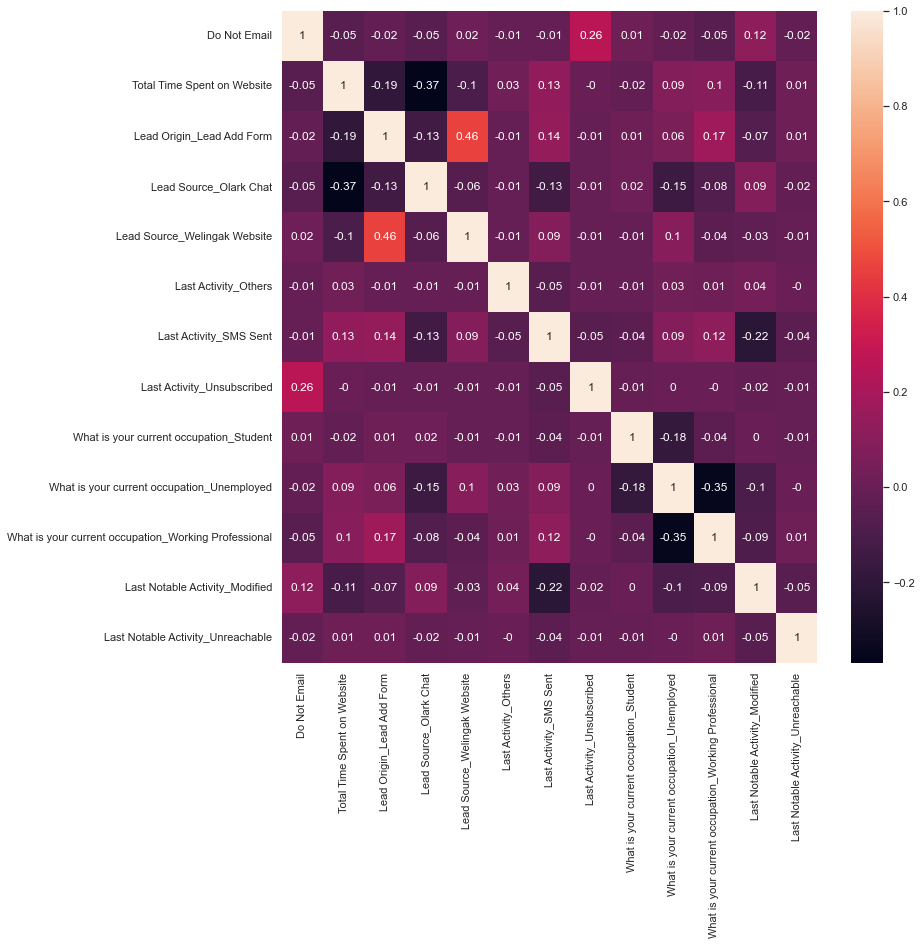

In [128]:
plt.figure(figsize=(12,12))
sns.heatmap(round(X.corr(),2), annot=True)
plt.show()

Since "Lead Source_Olark Chat" is having some correlation with "Total time spent on website" variable, therefore are dropping it too.

In [129]:
X = X.drop('Lead Source_Olark Chat', axis=1)

#### Model 10

In [130]:
X_train_sm = sm.add_constant(X)
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res10 = logm10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.7
Date:                Tue, 13 Sep 2022   Deviance:                       5335.3
Time:                        21:48:48   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7958      0.085    -21.238      0.000      -1.962      -1.630
Do Not Email                                            -1.4997      0.176     -8.534      0.000      -1.844      -1.155
Total Time Spent on Website                              0.9256      0.035     26.417      0.000       0.857       0.994
Lead Origin_Lead Add Form                                3.4578      0.221     15.629      0.000       3.024       3.891
Lead Source_Welingak Website                             1.7443      0.752      2.319      0.020       0.270       3.218
Last Activity_Others                                     1.7784      0.446      3.991      0.000       0.905       2.652
Last Activity_SMS Sent                                   1.2459      0.074     16.926      0.000       1.102       1.390
Last Activity_Unsubscribed                               1.0897      0.472      2.308      0.021       0.164       2.015
What is your current occupation_Student                  1.1867      0.244      4.856      0.000       0.708       1.666
What is your current occupation_Unemployed               1.0319      0.085     12.118      0.000       0.865       1.199
What is your current occupation_Working Professional     3.4944      0.195     17.937      0.000       3.113       3.876
Last Notable Activity_Modified                          -0.8363      0.078    -10.764      0.000      -0.989      -0.684
Last Notable Activity_Unreachable                        1.6707      0.520      3.215      0.001       0.652       2.689
========================================================================================================================
"""

In [131]:
check_vif(X)

,Features,VIF
8,What is your current occupation_Unemployed,1.66
2,Lead Origin_Lead Add Form,1.53
5,Last Activity_SMS Sent,1.45
3,Lead Source_Welingak Website,1.32
10,Last Notable Activity_Modified,1.32
9,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18
1,Total Time Spent on Website,1.11
6,Last Activity_Unsubscribed,1.08
7,What is your current occupation_Student,1.02


In [132]:
y_train_pred = res10.predict(X_train_sm)
y_train_pred[:10]

7962    0.863946
5520    0.185786
1962    0.292549
1566    0.952060
9170    0.170877
5097    0.068415
8954    0.580087
309     0.243572
5519    0.203370
1050    0.566668
dtype: float64

In [133]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86394604, 0.18578635, 0.29254892, 0.95206031, 0.17087665,
       0.06841462, 0.58008735, 0.24357163, 0.20337016, 0.56666848])

In [134]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID
0,0,0.863946,7962
1,0,0.185786,5520
2,0,0.292549,1962
3,1,0.952060,1566
4,0,0.170877,9170


In [135]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.863946,7962,1
1,0,0.185786,5520,0
2,0,0.292549,1962,0
3,1,0.952060,1566,1
4,0,0.170877,9170,0


In [136]:
# Let's see the accuracy of our logistic regression model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8036723163841808


Again, there is not much difference from the previous model. Let's see how far we can drop more.

In [137]:
X = X.drop('Last Activity_Unsubscribed', axis=1)

#### Model 11

In [138]:
X_train_sm = sm.add_constant(X)
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res11 = logm11.fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.0
Date:                Tue, 13 Sep 2022   Deviance:                       5340.0
Time:                        21:48:49   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3872
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7883      0.084    -21.187      0.000      -1.954      -1.623
Do Not Email                                            -1.3897      0.166     -8.390      0.000      -1.714      -1.065
Total Time Spent on Website                              0.9257      0.035     26.435      0.000       0.857       0.994
Lead Origin_Lead Add Form                                3.4603      0.221     15.630      0.000       3.026       3.894
Lead Source_Welingak Website                             1.7163      0.751      2.284      0.022       0.243       3.189
Last Activity_Others                                     1.7709      0.445      3.975      0.000       0.898       2.644
Last Activity_SMS Sent                                   1.2336      0.073     16.827      0.000       1.090       1.377
What is your current occupation_Student                  1.1775      0.244      4.827      0.000       0.699       1.656
What is your current occupation_Unemployed               1.0307      0.085     12.109      0.000       0.864       1.198
What is your current occupation_Working Professional     3.4885      0.194     17.951      0.000       3.108       3.869
Last Notable Activity_Modified                          -0.8421      0.078    -10.847      0.000      -0.994      -0.690
Last Notable Activity_Unreachable                        1.6641      0.520      3.203      0.001       0.646       2.682
========================================================================================================================
"""

In [139]:
check_vif(X)

,Features,VIF
7,What is your current occupation_Unemployed,1.65
2,Lead Origin_Lead Add Form,1.53
5,Last Activity_SMS Sent,1.44
3,Lead Source_Welingak Website,1.32
9,Last Notable Activity_Modified,1.31
8,What is your current occupation_Working Profes...,1.19
1,Total Time Spent on Website,1.11
0,Do Not Email,1.10
6,What is your current occupation_Student,1.02
4,Last Activity_Others,1.01


**This is our final model as all p-values and vif values are in range now and seems to have no multicollinearity**.

Now, We are going to predict the hot leads using our final model i.e Model 11th and after that we will calculate all the metrics i.e accuracy, sensitivity, specificity, precision & recall.

In [140]:
y_train_pred = res11.predict(X_train_sm)
y_train_pred[:10]

7962    0.863264
5520    0.186730
1962    0.290108
1566    0.952142
9170    0.171758
5097    0.068885
8954    0.578625
309     0.244729
5519    0.202571
1050    0.568256
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86326434, 0.18672989, 0.29010811, 0.95214171, 0.17175842,
       0.06888545, 0.57862506, 0.24472931, 0.20257115, 0.56825628])

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID
0,0,0.863264,7962
1,0,0.186730,5520
2,0,0.290108,1962
3,1,0.952142,1566
4,0,0.171758,9170


In [143]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted
0,0,0.863264,7962,1
1,0,0.186730,5520,0
2,0,0.290108,1962,0
3,1,0.952142,1566,1
4,0,0.171758,9170,0


In [144]:
# Let's see the accuracy of our logistic regression model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8041431261770244


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6978090119884249

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.889956994687579

### Plotting the ROC Curve

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

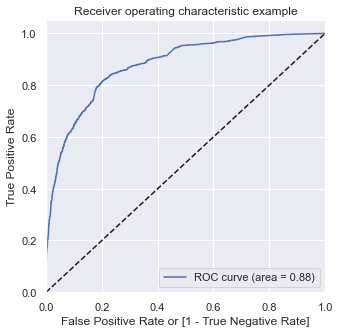

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.863264,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.186730,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.290108,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.952142,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.171758,9170,0,1,1,0,0,0,0,0,0,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.611739  0.964035  0.396155
0.2   0.2  0.734934  0.894998  0.636985
0.3   0.3  0.796453  0.837536  0.771313
0.4   0.4  0.808223  0.790409  0.819125
0.5   0.5  0.804143  0.680033  0.880091
0.6   0.6  0.799749  0.587846  0.929421
0.7   0.7  0.784369  0.510128  0.952188
0.8   0.8  0.756905  0.403886  0.972932
0.9   0.9  0.711237  0.254651  0.990640


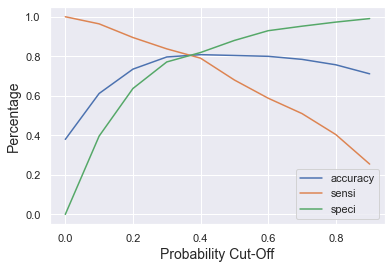

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability Cut-Off', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [154]:
# taking 0.37 as the threshold and predicting again.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.863264,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.186730,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.290108,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.952142,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.171758,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8055555555555556

In [156]:
# printing confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3191,  762],
       [ 477, 1942]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8028110789582472

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.8072350113837592

## Precision and Recall

In [160]:
from sklearn.metrics import precision_score, recall_score

In [161]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted) #using 0.5 cut-off

0.7763095799905616

In [162]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)   #using 0.5 cut-off

0.6800330715171559

### Precision and recall tradeoff

In [163]:
from sklearn.metrics import precision_recall_curve

In [164]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

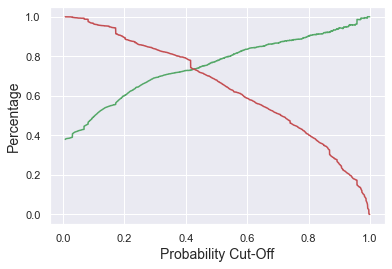

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Probability Cut-Off', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

We are not considering Precision - Recall view as we have achieved pretty decent performance using Sensitivity and Specificity View. Therefore we will use the optimal cut-off 0.37 on the test set. Let's see how it works

## Making predictions on the test set

In [167]:
#feature scaling on the numerical variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [168]:
# dropping the columns which are not present in the final model
X_test = X_test[X.columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3504,0,-0.103815,0,0,0,0,0,1,0,0,0
4050,0,-0.881052,1,0,0,1,0,1,0,0,0
7201,1,0.424120,0,0,0,1,0,1,0,0,0
1196,0,-0.105648,0,0,0,0,0,1,0,0,0
8219,0,-0.428274,0,0,0,0,0,1,0,0,0


In [169]:
# adding constant to the test set
X_test_sm = sm.add_constant(X_test)

In [170]:
y_test_pred = res11.predict(X_test_sm)

In [171]:
y_test_pred[:10]

3504    0.298654
4050    0.957740
7201    0.372609
1196    0.298298
8219    0.239746
8747    0.068885
9048    0.259007
6524    0.106843
7693    0.185457
8187    0.957740
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head
y_pred_1.head()

,0
3504,0.298654
4050,0.957740
7201,0.372609
1196,0.298298
8219,0.239746


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,3504,0.298654
1,1,4050,0.957740
2,0,7201,0.372609
3,0,1196,0.298298
4,1,8219,0.239746


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [180]:
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob
0,0,3504,0.298654
1,1,4050,0.957740
2,0,7201,0.372609
3,0,1196,0.298298
4,1,8219,0.239746


In [181]:
#predicting the final values using optimal thresold and creating a new column for that
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [182]:
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,final_predicted
0,0,3504,0.298654,0
1,1,4050,0.957740,1
2,0,7201,0.372609,1
3,0,1196,0.298298,0
4,1,8219,0.239746,0


In [183]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8088612229952399

In [184]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1373,  316],
       [ 206,  836]], dtype=int64)

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8023032629558541

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.812907045589106

After calculating Accuracy, Sensitivity and Specificity on the test set. Figures are almost the same xD

Hence we,ve found the best performing model for this problem as it fulfills all the business objectives.

In [188]:
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,final_predicted
0,0,3504,0.298654,0
1,1,4050,0.957740,1
2,0,7201,0.372609,1
3,0,1196,0.298298,0
4,1,8219,0.239746,0


In [189]:
#assigning lead scoring on the basis of conversion probablity
y_pred_final['lead_score'] = round(y_pred_final['Conversion_Prob'] * 100,1)

In [190]:
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,final_predicted,lead_score
0,0,3504,0.298654,0,29.9
1,1,4050,0.957740,1,95.8
2,0,7201,0.372609,1,37.3
3,0,1196,0.298298,0,29.8
4,1,8219,0.239746,0,24.0


### Final Observations -

**Train Set**

- Accuracy    - 81%
- Sensitivity - 80%
- Specificity - 81%

**Test Set**
- Accuracy    - 81%
- Sensitivity - 80%
- Specificity - 81%


# Thank You!